In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
pa_df=pd.read_csv('Port_Authority_ridership_3_2021.csv') #read in Port Authority data as csv file
pa_df1=pa_df.drop('ridership_route_code',axis=1) #drop 'ridership_route_code' column as it is a repeat
pa_df2=pa_df1.loc[pa_df1.loc[:,'route']!='MNT1',:] #drop rows with bus routes labeled 'MNT1' as data is sparse and sporadic,     #could be incorrect
pa_df2_b=pa_df2.loc[pa_df2.loc[:,'mode']=='Bus',:] #select Bus data
pa_df2_b_wk=pa_df2_b.loc[pa_df2_b.loc[:,'day_type']=='WEEKDAY',:]#select day_type as 'Weekday' to create week day ridership #table

In [3]:
tmp20=pa_df2_b_wk
tmp20 = tmp20.loc[tmp20.loc[:,'route']!='68',:]# remove bus route 68 as it has only 30 weeks data
tmp20 = tmp20.loc[tmp20.loc[:,'route']!='78',:]# remove bus route 78 as it has only 9 weeks data
tmp21 = pd.DataFrame()
for i in sorted(set(tmp20['route'])): # this for loop creates a dataframe of 'avg_riders' columns, one for each bus route
    add_df=tmp20.loc[tmp20.loc[:,'route']==i,:]
    add_srs=add_df.set_index('year_month').loc[:,'avg_riders']# the index of the table is set as the column 'year_month'
    tmp21=pd.concat([tmp21,add_srs],axis=1)
tmp21.columns=sorted(set(tmp20['route']))
tmp21.index=pd.Series(list(map(lambda x: str(x), tmp21.index)))# the index is coverted to a string to make it equally spaced


In [22]:
tmp21_sum=tmp21.sum(axis=1)
tmp22=pd.concat([tmp21,tmp21_sum],axis=1)
tmp22.rename({0:'All'},axis=1,inplace=True)
print(round(tmp22.loc['201901':'201912',:].mean(axis=0).sort_values()[-11:]))

tmp21_1=tmp21.loc['201901':'201912',:]
tmp21_2 = tmp21_1.T
tmp21_3=pd.concat([tmp21_2,round(tmp21_2.mean(axis=1),1)],axis=1)
tmp23_1=tmp21.loc['202004':'202103',:]
tmp23_2 = tmp23_1.T
tmp23_3=pd.concat([tmp23_2,round(tmp23_2.mean(axis=1),1)],axis=1)
tmp24_3=pd.concat([tmp21_3.loc[:,0],tmp23_3.loc[:,0]],axis=1)
tmp24_3.columns = ['2019','covid']

91       4478.0
71D      4528.0
61A      4994.0
71B      5086.0
61D      5669.0
71A      5696.0
71C      5805.0
61C      6283.0
51       8102.0
P1      10347.0
All    184921.0
dtype: float64


<AxesSubplot:title={'center':'Avg Daily Riders on Weekdays'}, xlabel='Date', ylabel='Number of Riders'>

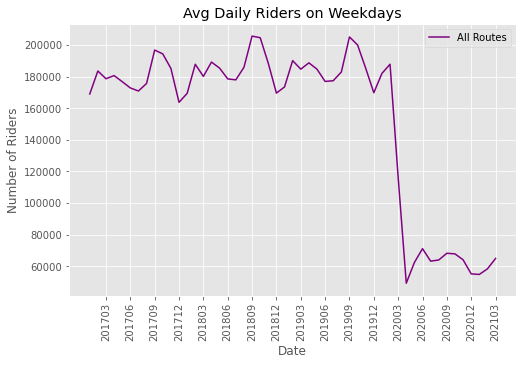

In [5]:
tmp22.plot.line(figsize=(8,5),color='Purple',y='All',title= "Avg Daily Riders on Weekdays",label='All Routes',
                xticks=range(2,52,3),rot=90,xlabel='Date',ylabel='Number of Riders') 

<AxesSubplot:title={'center':'Avg Daily Riders on Weekdays'}, xlabel='Date', ylabel='Number of Riders'>

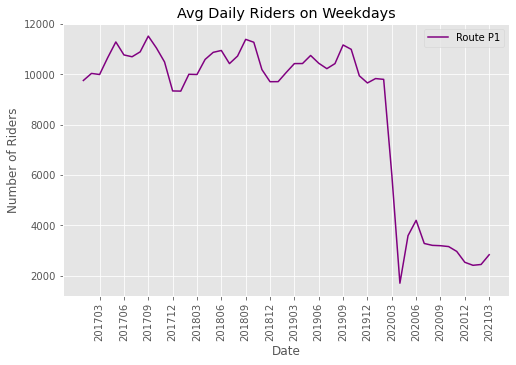

In [6]:
tmp22.plot.line(figsize=(8,5),color='Purple',y='P1',title= "Avg Daily Riders on Weekdays",label='Route P1',
                xticks=range(2,52,3),rot=90,xlabel='Date',ylabel='Number of Riders')

<AxesSubplot:title={'center':'Avg Daily Riders on Weekdays'}, xlabel='Date', ylabel='Number of Riders'>

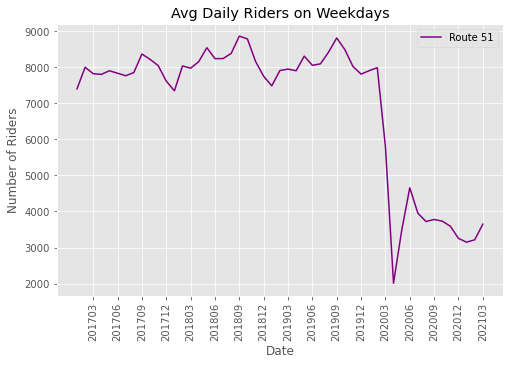

In [7]:
tmp22.plot.line(figsize=(8,5),color='Purple',y='51',title= "Avg Daily Riders on Weekdays",label='Route 51',
                xticks=range(2,52,3),rot=90,xlabel='Date',ylabel='Number of Riders')

<AxesSubplot:title={'center':'Avg Daily Riders on Weekdays'}, xlabel='Date', ylabel='Number of Riders'>

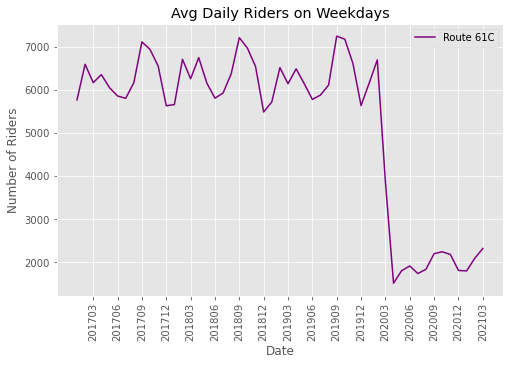

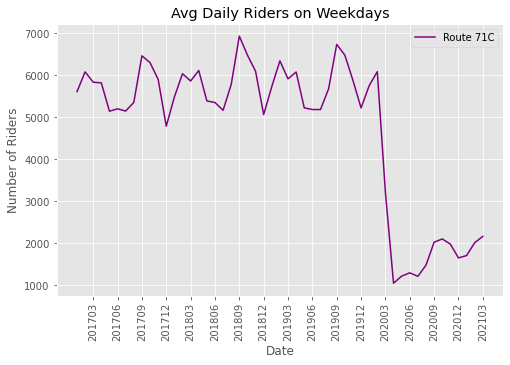

In [8]:
tmp22.plot.line(figsize=(8,5),color='Purple',y='61C',title= "Avg Daily Riders on Weekdays",label='Route 61C',
                xticks=range(2,52,3),rot=90,xlabel='Date',ylabel='Number of Riders') 
tmp22.plot.line(figsize=(8,5),color='Purple',y='71C',title= "Avg Daily Riders on Weekdays",label='Route 71C',
                xticks=range(2,52,3),rot=90,xlabel='Date',ylabel='Number of Riders') 


<AxesSubplot:title={'center':'Avg weekday ridership during 2019 and covid period(2020:4-2021:3) \n  Distribution across bus routes '}, ylabel='Number of Riders'>

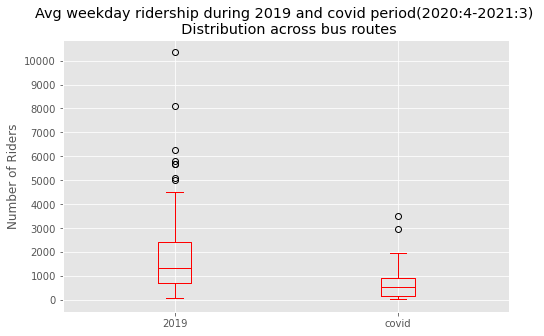

In [9]:
tmp24_3.plot(kind='box',figsize=(8,5),color='Red',yticks=range(0,11000,1000),title="Avg weekday ridership during 2019 and covid period(2020:4-2021:3) \n  Distribution across bus routes ",
        ylabel='Number of Riders') 

In [10]:
round(tmp24_3.describe(),1)


,2019,covid
count,95.0,95.0
mean,1946.5,651.9
std,1819.7,615.3
min,74.4,18.1
25%,704.5,178.0
50%,1320.9,524.2
75%,2414.0,905.4
max,10346.8,3515.2


In [16]:
def pct_diff(df,start='201901',end='201912'):
    '''
    This function takes as input the data frame containing the time series of average riders for each of the bus routes and 
    calculates from it the absolute difference and percentage difference from the average level over a time period that can 
    be provided by the user. Both of these are dataframes which are returned. The default for the time period is the 2019 
    calendar year (2019:01 - 2019:12)
    '''
 
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    for i in df.columns: #this for loop calculates percentage changes in the 'avg_riders' column across time using the average
        col_ave=np.mean(df.loc[start:end,i]) # of the values in 2019 as the baseline
        diff = df.loc[:,i]-col_ave
        pc_diff=round(diff/col_ave*100,1)
        df1=pd.concat([df1,diff],axis=1)
        df2=pd.concat([df2,pc_diff],axis=1)
    df1.columns=df.columns
    df1.index=df.index
    df2.columns=df.columns
    df2.index=df.index
    return df1,df2 #returns two dataframes - absolute and percentage differences

tmp31,tmp32 = pct_diff(tmp21)

In [17]:
tmp32

,1,11,12,13,14,15,16,17,18,19L,...,P69,P7,P71,P76,P78,Y1,Y45,Y46,Y47,Y49
201701,-10.0,-0.7,-25.2,-5.2,-17.5,-7.9,-2.5,-13.9,-13.6,-3.4,...,-2.9,1.0,7.0,5.9,-34.2,1.3,-3.8,-8.7,-13.1,-9.1
201702,-5.0,-2.9,-25.1,1.7,-10.3,1.0,3.7,-8.9,8.2,0.4,...,4.3,7.4,15.5,10.4,-28.0,7.9,11.4,-2.7,-7.2,-0.8
201703,-2.5,-0.5,-25.5,0.8,-9.4,-4.4,2.1,-7.4,8.2,1.8,...,9.0,5.3,13.1,12.9,-28.2,3.6,2.7,-4.2,-6.5,0.6
201704,-0.7,-1.3,-17.7,0.5,-7.0,-5.2,0.8,-10.8,-1.1,0.3,...,11.8,3.0,2.8,14.7,-30.7,8.6,-7.8,-4.1,-9.7,2.2
201705,-0.1,0.7,-19.5,2.8,-2.5,2.0,4.0,-5.2,3.0,1.5,...,11.4,8.7,5.1,9.5,-26.0,1.3,-1.7,-2.2,-10.6,0.3
201706,4.8,-2.2,-15.7,-1.1,-3.3,-6.4,2.0,-7.2,5.1,-1.9,...,15.4,6.7,4.9,8.0,-27.3,-0.8,-0.2,-0.7,-6.5,2.8
201707,3.3,-4.9,-17.1,-2.8,-5.7,-5.3,2.9,-5.8,15.5,-11.3,...,16.9,10.8,-3.7,5.8,-25.9,-4.2,-3.8,-1.4,-8.9,4.2
201708,6.1,-5.3,-12.5,-4.5,-4.1,-7.7,1.2,-5.3,4.1,0.6,...,12.2,13.1,-2.3,4.7,-24.2,-0.2,-2.4,2.9,-4.4,4.8
201709,5.5,4.2,-12.3,7.3,-2.8,5.4,7.1,-2.6,14.5,1.3,...,8.6,15.8,-2.5,-2.0,-3.6,7.0,10.6,5.0,3.7,9.7
201710,2.3,3.6,-11.4,2.5,0.5,4.6,6.0,0.2,12.4,0.4,...,11.0,15.7,3.2,3.6,-5.9,1.5,-9.6,4.7,4.6,9.6


In [18]:
tmp32_2 = tmp32.T
tmp32_3=tmp32_2.loc[:,['202004','202012','202103']]

In [19]:
tmp32_3

,202004,202012,202103
1,-49.4,-39.0,-31.3
11,-46.0,-50.9,-48.7
12,-65.5,-43.5,-42.5
13,-68.1,-51.8,-55.7
14,-70.4,-56.2,-50.9
...,...,...,...
Y1,-66.7,-93.4,-91.5
Y45,-81.9,-83.0,-81.9
Y46,-59.0,-70.4,-66.4
Y47,-60.3,-64.3,-66.0


<AxesSubplot:title={'center':'% drop in weekday ridership during covid period(2020:04, 2020:12 and 2021:03) from avg 2019 level\n  Distribution across bus routes '}, ylabel='Number of Riders'>

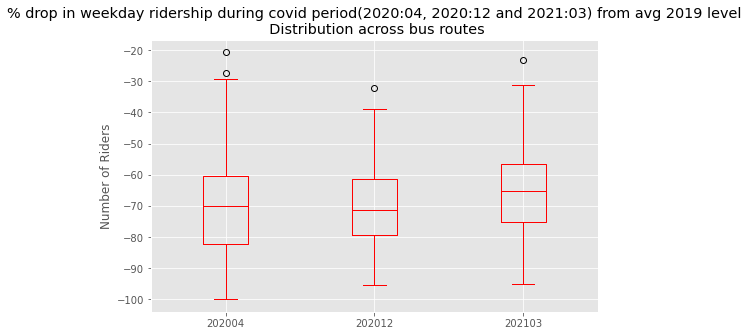

In [21]:
tmp32_3.plot(kind='box',figsize=(8,5),color='Red',title="% drop in weekday ridership during covid period(2020:04, 2020:12 and 2021:03) from avg 2019 level\n  Distribution across bus routes ",
        ylabel='Number of Riders') 

91       4478.0
71D      4528.0
61A      4994.0
71B      5086.0
61D      5669.0
71A      5696.0
71C      5805.0
61C      6283.0
51       8102.0
P1      10347.0
All    184921.0
dtype: float64


<AxesSubplot:title={'center':'% drop in weekday ridership during covid period(2020:04, 2020:12 and 2021:03) from avg 2019 level\n  Distribution across bus routes '}, ylabel='Number of Riders'>

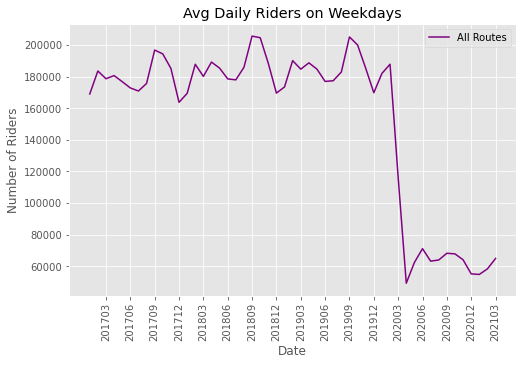

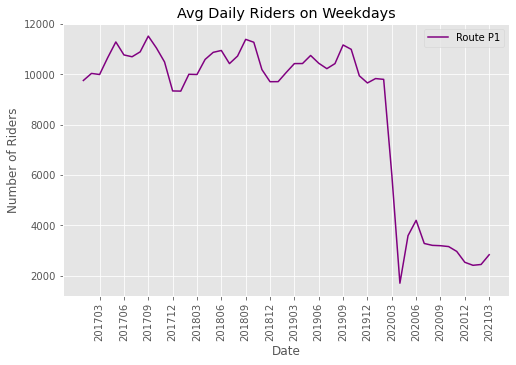

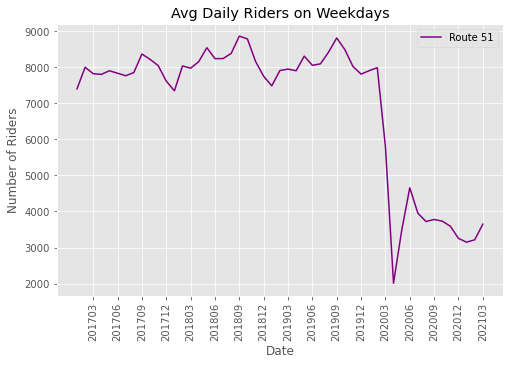

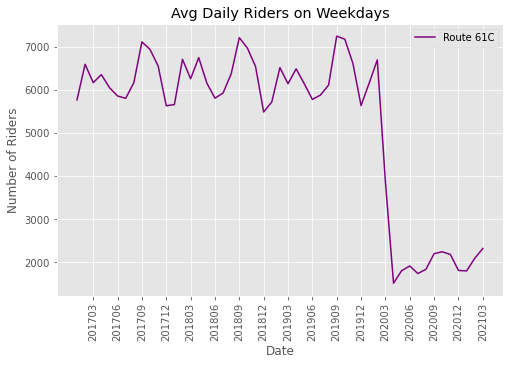

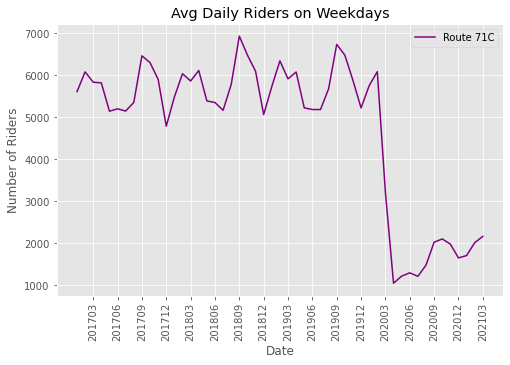

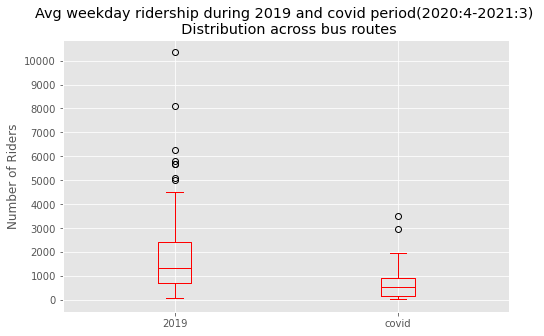

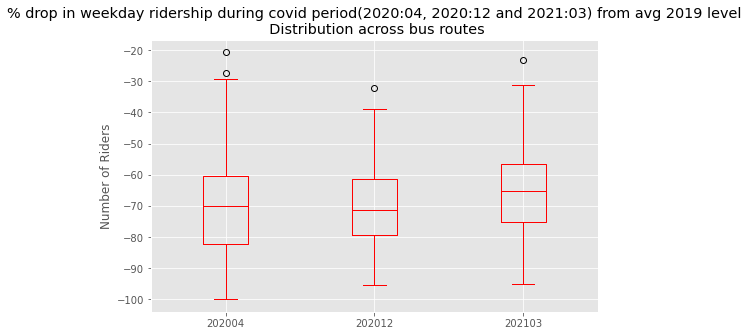

In [23]:
#This program reads data from the csv file containing average ridership data from the Port Authority of Allegheny County
# It performs various calculations with the data and then creates a series of line graphs and box plots displaying
# the drop in ridership due to covid
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
pa_df=pd.read_csv('Port_Authority_ridership_3_2021.csv') #read in Port Authority data as csv file
pa_df1=pa_df.drop('ridership_route_code',axis=1) #drop 'ridership_route_code' column as it is a repeat
pa_df2=pa_df1.loc[pa_df1.loc[:,'route']!='MNT1',:] #drop rows with bus routes labeled 'MNT1' as data is sparse and appears     #incorrect
pa_df2_b=pa_df2.loc[pa_df2.loc[:,'mode']=='Bus',:] #select Bus data
pa_df2_b_wk=pa_df2_b.loc[pa_df2_b.loc[:,'day_type']=='WEEKDAY',:]#select day_type as 'Weekday' to create week day ridership #table


tmp20=pa_df2_b_wk
tmp20 = tmp20.loc[tmp20.loc[:,'route']!='68',:]# Additional data cleansing to remove bus routes 68 and 78 as they have only
tmp20 = tmp20.loc[tmp20.loc[:,'route']!='78',:]# 30 weeks and 9 weeks data respectively
tmp21 = pd.DataFrame() # below for loop creates a dataframe of 'avg_riders' columns, one for each bus route
for i in sorted(set(tmp20['route'])): 
    add_df=tmp20.loc[tmp20.loc[:,'route']==i,:]
    add_srs=add_df.set_index('year_month').loc[:,'avg_riders']# the index of the dataframe is set as the column 'year_month'
    tmp21=pd.concat([tmp21,add_srs],axis=1)
tmp21.columns=sorted(set(tmp20['route'])) # the columns are given the names of the bus routes 
tmp21.index=pd.Series(list(map(lambda x: str(x), tmp21.index)))# the index is coverted to a string so that it would 
                                                               # show up as equally spaced when graphed


tmp21_sum=tmp21.sum(axis=1) # the aggregate ridership across all bus routes is calculated and added as a column to the 
tmp22=pd.concat([tmp21,tmp21_sum],axis=1) # dataframe
tmp22.rename({0:'All'},axis=1,inplace=True) # its column name is set to 'All'
print(round(tmp22.loc['201901':'201912',:].mean(axis=0).sort_values()[-11:])) # the average ridership in 2019 of the 10 busiest 
                                                                              # bus routes is calculated

tmp21_1=tmp21.loc['201901':'201912',:] # a dataframe with two columns is created below - one showing the average ridership
                                       # in 2019 and the other showing average ridership during the covid period 
                                       # 2020:04 - 2021:03 - across all the bus routes. This dataframe is then used
                                       # for creating boxplot distributions
tmp21_2 = tmp21_1.T
tmp21_3=pd.concat([tmp21_2,round(tmp21_2.mean(axis=1),1)],axis=1)
tmp23_1=tmp21.loc['202004':'202103',:]
tmp23_2 = tmp23_1.T
tmp23_3=pd.concat([tmp23_2,round(tmp23_2.mean(axis=1),1)],axis=1)
tmp24_3=pd.concat([tmp21_3.loc[:,0],tmp23_3.loc[:,0]],axis=1)
tmp24_3.columns = ['2019','covid']

# Line plots are created for 1. All bus routes and 2. Four of the top 10 busiest bus routes. Two of them - P1 and 51- do 
# not pass through the major universities while the other two 61C and 71C do. The purpose is to show differences in 
# seasonality in the ridership across these buses though all buses, in general, do show some seasonality in ridership

tmp22.plot.line(figsize=(8,5),color='Purple',y='All',title= "Avg Daily Riders on Weekdays",label='All Routes',
                xticks=range(2,52,3),rot=90,xlabel='Date',ylabel='Number of Riders') 
tmp22.plot.line(figsize=(8,5),color='Purple',y='P1',title= "Avg Daily Riders on Weekdays",label='Route P1',
                xticks=range(2,52,3),rot=90,xlabel='Date',ylabel='Number of Riders')
tmp22.plot.line(figsize=(8,5),color='Purple',y='51',title= "Avg Daily Riders on Weekdays",label='Route 51',
                xticks=range(2,52,3),rot=90,xlabel='Date',ylabel='Number of Riders')
tmp22.plot.line(figsize=(8,5),color='Purple',y='61C',title= "Avg Daily Riders on Weekdays",label='Route 61C',
                xticks=range(2,52,3),rot=90,xlabel='Date',ylabel='Number of Riders') 
tmp22.plot.line(figsize=(8,5),color='Purple',y='71C',title= "Avg Daily Riders on Weekdays",label='Route 71C',
                xticks=range(2,52,3),rot=90,xlabel='Date',ylabel='Number of Riders') 

# Box plots are created below to show the differences in distribution of ridership across bus routes during 2019
# and during the covid period
tmp24_3.plot(kind='box',figsize=(8,5),color='Red',yticks=range(0,11000,1000),title="Avg weekday ridership during 2019 and covid period(2020:4-2021:3) \n  Distribution across bus routes ",
        ylabel='Number of Riders') 
round(tmp24_3.describe(),1) # descriptive statistics are created

# the below function calculates absolute and percentage differences in ridership
#################################################################################
def pct_diff(df,start='201901',end='201912'):
    '''
    This function takes as input the data frame containing the time series of average riders for each of the bus routes and 
    calculates from it the absolute difference and percentage difference from the average level over a time period that can 
    be provided by the user. Both of these are dataframes which are returned. The default for the time period is the 2019 
    calendar year (2019:01 - 2019:12)
    '''
 
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    for i in df.columns: #this for loop calculates percentage changes in the 'avg_riders' column across time using the average
        col_ave=np.mean(df.loc[start:end,i]) # of the values in 2019 as the baseline
        diff = df.loc[:,i]-col_ave
        pc_diff=round(diff/col_ave*100,1)
        df1=pd.concat([df1,diff],axis=1)
        df2=pd.concat([df2,pc_diff],axis=1)
    df1.columns=df.columns
    df1.index=df.index
    df2.columns=df.columns
    df2.index=df.index
    return df1,df2 #returns two dataframes - absolute and percentage differences
###################################################################################

tmp31,tmp32 = pct_diff(tmp21) # create dataframes of absolute and percentage differences in ridership
tmp32_2 = tmp32.T
tmp32_3=tmp32_2.loc[:,['202004','202012','202103']] # create a subset of the dataframe corresponding to three different
                                                    # dates during the covid period
# Boxplots are created of the distribution of percentage drops in ridership during these three dates
tmp32_3.plot(kind='box',figsize=(8,5),color='Red',title="% drop in weekday ridership during covid period(2020:04, 2020:12 and 2021:03) from avg 2019 level\n  Distribution across bus routes ",
        ylabel='Number of Riders') 